In [1]:
import matplotlib. pyplot as plt

1/1 [==============================] - 0s 99ms/step


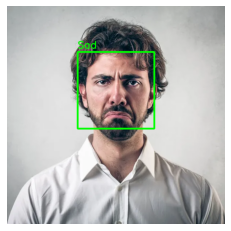

In [3]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import model_from_json

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load the pre-trained face emotion detection model
model = model_from_json(open("facial_expression_model_structure.json", "r").read())
model.load_weights('facial_expression_model_weights.h5')

# Define the emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the image
image_path = 'depositphotos_39338615-stock-photo-sad-man.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Process each face found
for (x, y, w, h) in faces:
    # Extract the face region of interest
    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (48, 48))
    roi = face.astype("float") / 255.0

    roi = np.expand_dims(roi, axis=0)

    # Make emotion prediction
    predictions = model.predict(roi)[0]
    emotion_label_arg = np.argmax(predictions)
    emotion_label = emotion_labels[emotion_label_arg]

    # Draw a rectangle around the face and label the emotion
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
    cv2.putText(image, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Convert BGR image to RGB for plotting
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected emotions
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
